<a href="https://colab.research.google.com/github/Jalmeid4/entregatarea6/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inciso 1

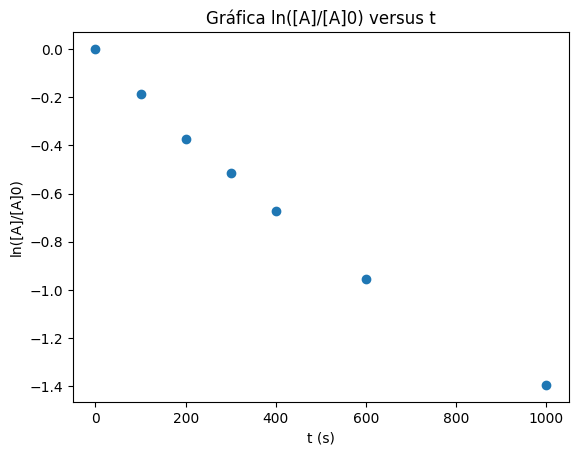

El orden de la reacción es: 1.0
La constante de velocidad es: 1.0


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t = np.array([0, 100, 200, 300, 400, 600, 1000])
A_ratio = np.array([1, 0.829, 0.688, 0.597, 0.511, 0.385, 0.248])

# Función para el modelo de ajuste
def reaction_model(t, k, n):
    return np.exp(-k * t**n)

# Ajuste de los datos experimentales
popt, pcov = curve_fit(reaction_model, t, A_ratio)

# Parámetros del ajuste
k = popt[0]
n = popt[1]

# Graficar ln([A]/[A]0) versus t
ln_A_ratio = np.log(A_ratio)
plt.plot(t, ln_A_ratio, 'o')
plt.xlabel('t (s)')
plt.ylabel('ln([A]/[A]0)')
plt.title('Gráfica ln([A]/[A]0) versus t')
plt.show()

# Orden de reacción y constante de velocidad
reaction_order = n
rate_constant = k

print("El orden de la reacción es:", reaction_order)
print("La constante de velocidad es:", rate_constant)

Inciso 2

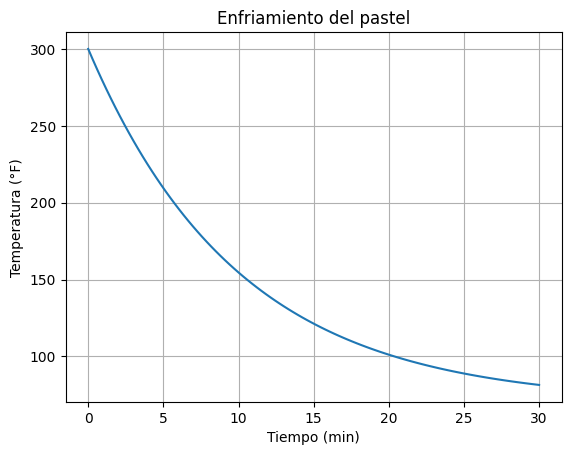

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
T0 = 300  # Temperatura inicial (°F)
Tf = 70   # Temperatura final (°F)
k = 0.1   # Constante de enfriamiento

# Función de enfriamiento
def temperature_func(t):
    return Tf + (T0 - Tf) * np.exp(-k * t)

# Tiempo
t = np.linspace(0, 30, 100)  # Cambiar el rango si es necesario

# Temperatura
T = temperature_func(t)

# Graficar
plt.plot(t, T)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°F)')
plt.title('Enfriamiento del pastel')
plt.grid(True)
plt.show()

Inciso 3

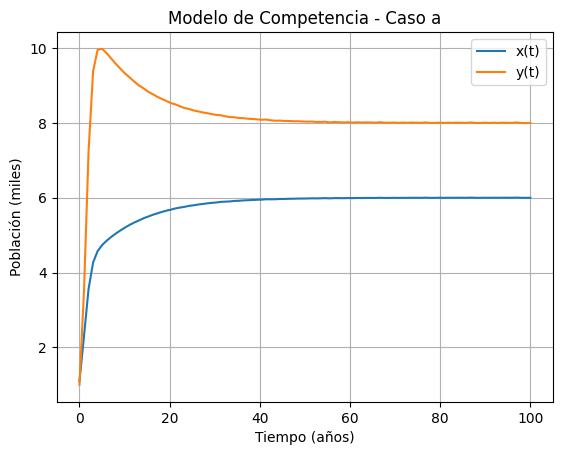

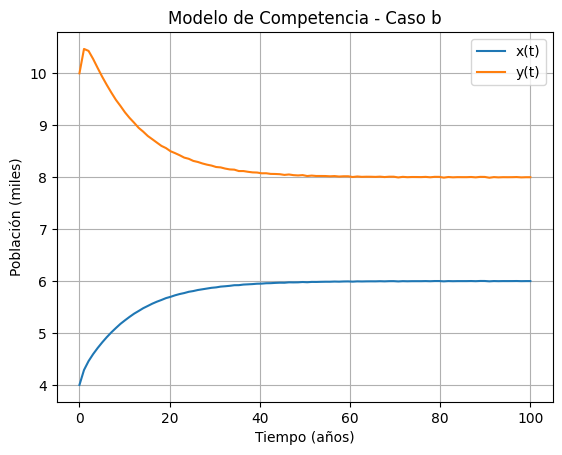

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir las ecuaciones diferenciales del modelo de competencia
def competition_model(t, variables):
    x, y = variables
    dxdt = x * (1 - 0.1 * x - 0.05 * y)
    dydt = y * (1.7 - 0.1 * y - 0.15 * x)
    return [dxdt, dydt]

# Condiciones iniciales
x0_a, y0_a = 1.1, 1
x0_b, y0_b = 4, 10

# Resolver para caso a)
solution_a = solve_ivp(competition_model, [0, 100], [x0_a, y0_a], dense_output=True)

# Resolver para caso b)
solution_b = solve_ivp(competition_model, [0, 100], [x0_b, y0_b], dense_output=True)

# Tiempo para evaluar la solución
t_eval = np.linspace(0, 100, 100)

# Evaluar la solución para caso a)
x_a, y_a = solution_a.sol(t_eval)

# Evaluar la solución para caso b)
x_b, y_b = solution_b.sol(t_eval)

# Graficar las poblaciones en función del tiempo
plt.plot(t_eval, x_a, label='x(t)')
plt.plot(t_eval, y_a, label='y(t)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población (miles)')
plt.title('Modelo de Competencia - Caso a')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(t_eval, x_b, label='x(t)')
plt.plot(t_eval, y_b, label='y(t)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población (miles)')
plt.title('Modelo de Competencia - Caso b')
plt.legend()
plt.grid(True)
plt.show()